<h1 align="center"><font color='green'>BoomBikes</font></h1>
<h4 align="right"> <font color='blue'>- By Ankan Roy</font></h3> 

#### Porblem Statement : 
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal :
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<h2 align="left"> <font color='brown'>Importing the libraries</font></h2>

In [380]:
import warnings
warnings.filterwarnings('ignore')

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

from matplotlib import style
plt.style.use('seaborn')

<h2 align="left"> <font color='brown'>Reading Dataset</font></h2>
    
- **Variables**
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : working day is 1, otherwise is 0 (weekend and holiday).
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered

In [382]:
# Reading dataset and the name of the data frame is bikes
bikes = pd.read_csv('day.csv') # Keep the dataset in the same folder from where this notebook is started.

In [383]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [384]:
bikes.shape # 730 values and 16 columns

(730, 16)

In [386]:
bikes.info() # No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [387]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="alert alert-block alert-info">
<b>Inference</b>
    <br><br>
    <li>Dataset contains 16 columns and 730 records.</li>
    <li>Instant column can be dropped because it is just an index.</li>
    <li>dteday can be dropped because we have the season, weekday , working day and year column seprately.</li>
    <li>There are no null values.</li>
    <li>Target variable (Y) is cnt</li>
    <li>casual and registered variables are also a target variables but will consider cnt because BoomBikes need to know the overall demand of share bikes.Hence casual and registered columns can be dropped.</li><br>
</div>

In [388]:
# Droping uncessary columns
bikes.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

In [389]:
bikes.shape

(730, 12)

In [390]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


<h2 align="left"> <font color='brown'>Data Visualisation</font></h2>

- **Numeric variables**

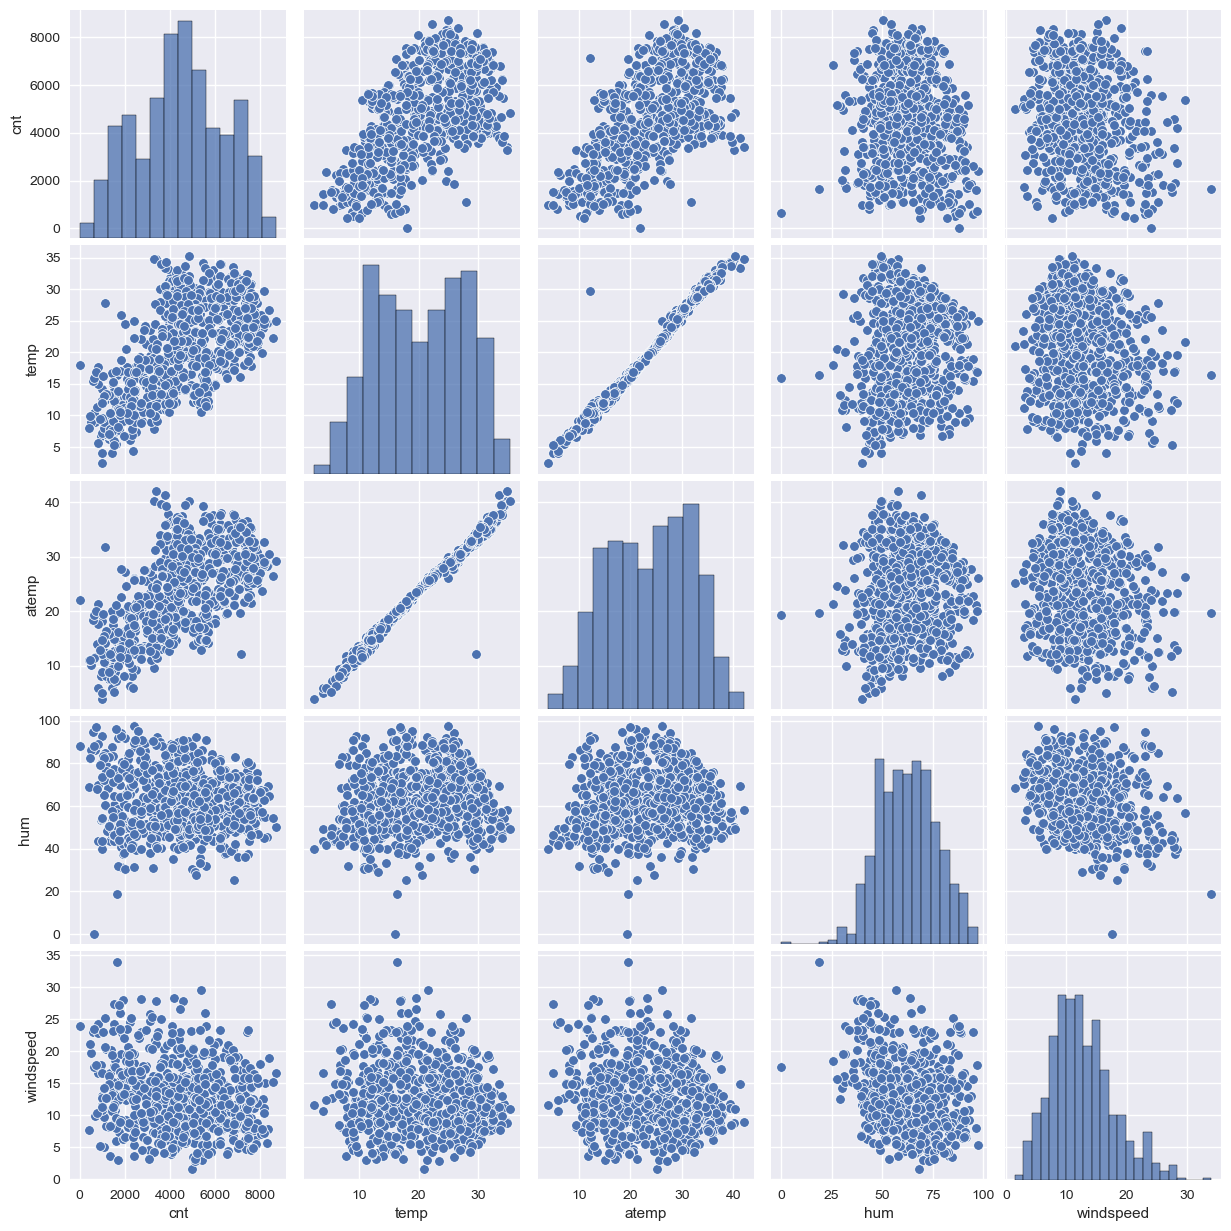

In [391]:
# pair plot for numeric variables
num_var_df = bikes[['cnt','temp','atemp','hum','windspeed']]
sns.pairplot(num_var_df)

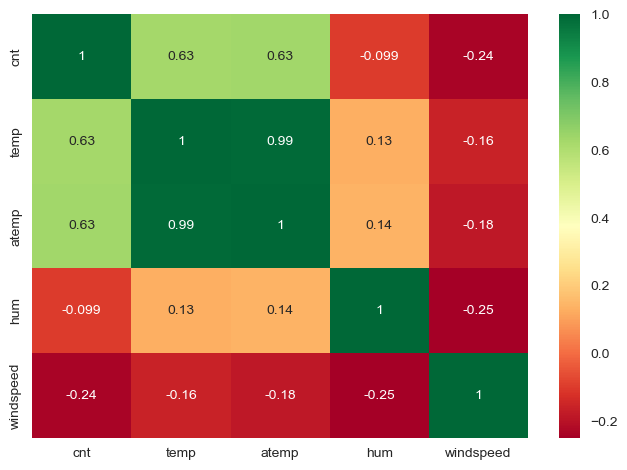

In [392]:
# Creating heatmap
sns.heatmap(num_var_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

- **Categorical variable**

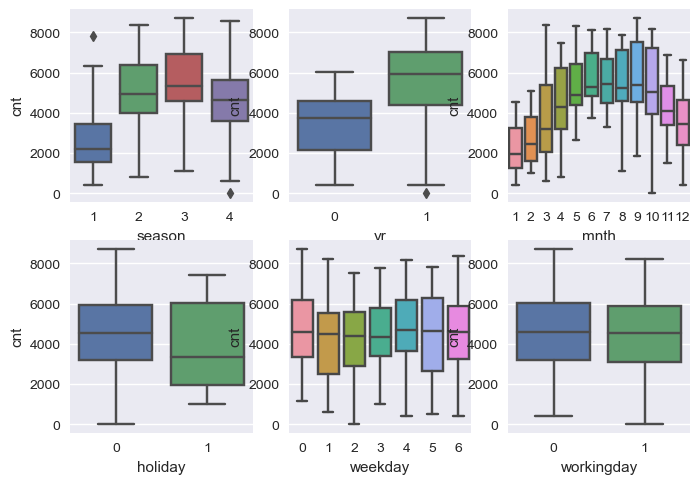

In [393]:
# box plot for categorical variable 
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

<h2 align="left"> <font color='brown'>Data Preperation</font></h2>

**Dummy variable creation**

In [394]:
bikes['season'] = bikes['season'].map({1: 'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['mnth']=bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                              5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weekday']=bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikes['weathersit']=bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [395]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- Season has 4 levels (season (1:spring, 2:summer, 3:fall, 4:winter)) hence we need to create dummy variables. 

In [396]:
# Creating dummy variables and drop the columns which is not required like (m-1)*n where m is level 
# and n is category
seasons = pd.get_dummies(bikes['season'], drop_first = True)
month = pd.get_dummies(bikes.mnth,drop_first = True)
weekdays = pd.get_dummies(bikes.weekday,drop_first = True)
weather = pd.get_dummies(bikes.weathersit,drop_first = True)

In [397]:
bikes = pd.concat([bikes,seasons,month,weekdays,weather], axis = 1)

In [398]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [399]:
# Dropping the original categorical variable 
bikes.drop(['season','mnth','weekday','weathersit'],axis = 1, inplace = True)

In [400]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


<h2 align="left"> <font color='brown'>Model Preperation</font></h2>

- **Train-Test Split**

In [401]:
bikes_train, bikes_test = train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=100)

In [402]:
# Training data frame
bikes_train.shape

(510, 30)

In [403]:
# Test data frame
bikes_test.shape

(219, 30)

- **Dividing X (features) and y (target variable)**

In [404]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [405]:
X_train.shape

(510, 29)

In [406]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [407]:
X_test.shape

(219, 29)

<h2 align="left"> <font color='brown'>Model Training</font></h2>

In [408]:
# Libraries for model creation, training and calculating VIF(for Multicollinearity)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [409]:
# Function to create model
def model_creation(X,y):
    model = sm.OLS(y,X).fit()
    print(model.summary())
    return model

In [410]:
# Function to calculate VIF
def vif_calculator (X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

 - **First model creation with all the variable**

In [411]:
X_train_with_const = sm.add_constant(X_train)

In [412]:
model_1 = model_creation(X_train_with_const,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          4.09e-178
Time:                        13:20:10   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     480   BIC:                             8391.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3298.2666    752.899      4.381

In [418]:
vif_calculator(X_train_with_const)

        Variables         VIF
0           const  479.906760
4            temp   67.038048
3      workingday   66.331166
5           atemp   55.881304
24            Sun   38.788424
23            Sat   36.988394
8          spring   10.811671
10         winter    9.524295
9          summer    8.313862
2         holiday    6.798281
19            Nov    6.796732
20            Oct    6.594963
11            Aug    6.554624
14            Jan    5.905549
15           July    5.724035
12            Dec    5.676993
21            Sep    4.951073
13            Feb    4.412222
17            Mar    3.474259
16           June    2.888276
18            May    2.248554
6             hum    2.057107
26            Tue    1.787289
22            Mon    1.781741
25            Thu    1.758004
27            Wed    1.748765
29  Mist + Cloudy    1.601851
7       windspeed    1.308449
28     Light Snow    1.300377
1              yr    1.060126


<div class="alert alert-block alert-info">
<b>Inference from Model 1</b>
    <br><br>
    <li>R-squared : 85.1 % </li>
    <li>Adj. R-squared : 84.2 %</li>
    <li>Variable with hight p value is 'atemp'</li>
    <li>VIF of 'atemp' is 55(very high)</li>
    <li>Need to drop atemp it is highly correlated with other variables and specially with 'temp' </li>
</div>

- **Second model creation**

In [419]:
# remove atemp feature because VIF and p value both are high
X_train_revised = X_train_with_const.drop('atemp',1)

In [420]:
model_2 = model_creation(X_train_revised,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          4.33e-179
Time:                        13:32:53   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     481   BIC:                             8385.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3310.7837    751.266      4.407

In [421]:
vif_calculator(X_train_revised)

        Variables         VIF
0           const  478.712084
3      workingday   66.316400
23            Sun   38.780261
22            Sat   36.988388
7          spring   10.795336
9          winter    9.505737
8          summer    8.288630
4            temp    7.152219
2         holiday    6.797825
18            Nov    6.796704
19            Oct    6.594170
10            Aug    6.437947
13            Jan    5.904350
14           July    5.683523
11            Dec    5.676982
20            Sep    4.932249
12            Feb    4.411853
16            Mar    3.472280
15           June    2.833906
17            May    2.226710
5             hum    2.054711
25            Tue    1.787159
21            Mon    1.781648
24            Thu    1.757969
26            Wed    1.748763
28  Mist + Cloudy    1.601597
27     Light Snow    1.294278
6       windspeed    1.248004
1              yr    1.059294


<div class="alert alert-block alert-info">
<b>Inference from Model 2</b>
    <br><br>
    <li>R-squared : 85.1 % </li>
    <li>Adj. R-squared : 84.2 %</li>
    <li>Variable with hight p value is 'June','Mar','Oct','Aug'</li>
    <li>VIF of 'workingday','Sat' and 'Sun' is high but corresponding p kind off less will evaluate in next model. </li>
    <li>Since P values of 'June','Mar','Oct','Aug' are more will drop these columns  </li>
</div>

- **Third model creation**

In [422]:
# remove june, mar and oct because p value is high
X_train_revised = X_train_with_const.drop(['June','Mar','Oct','atemp','Aug'],1)

In [423]:
model_3 = model_creation(X_train_revised,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          4.96e-183
Time:                        13:34:38   Log-Likelihood:                -4102.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     485   BIC:                             8361.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3406.8642    724.444      4.703

In [424]:
vif_calculator(X_train_revised)

        Variables         VIF
0           const  448.208263
3      workingday   66.161206
19            Sun   38.696163
18            Sat   36.912017
2         holiday    6.797224
7          spring    5.812635
4            temp    4.907423
9          winter    3.888125
8          summer    3.496943
12            Jan    2.376673
5             hum    1.982372
11            Feb    1.872013
15            Nov    1.844765
21            Tue    1.784965
17            Mon    1.764660
20            Thu    1.749983
22            Wed    1.742996
10            Dec    1.666791
24  Mist + Cloudy    1.593826
14            May    1.521897
13           July    1.508914
16            Sep    1.344549
23     Light Snow    1.290827
6       windspeed    1.227931
1              yr    1.047237


<div class="alert alert-block alert-info">
<b>Inference from Model 3</b>
    <br><br>
    <li>R-squared : 85.1 % (No change from prev model) </li>
    <li>Adj. R-squared : 84.3 % (Slight change from prev model)</li>
    <li>Variable with hight p value is 'Sun','Sat','Thu','Wed'</li>
    <li>VIF of 'Sat' and 'Sun' is high.</li>
    <li>Since P values and VIF of 'Sun','Sat' is high will drop these columns.</li>
    <li>'Thu','Wed' has high p value so will drop these also.</li>
</div>

- **Fourth model creation**

In [432]:
X_train_revised = X_train_with_const.drop(['June','Mar','Oct','atemp','Aug','Sun','Sat','Thu','Wed'],1)

In [433]:
model_4 = model_creation(X_train_revised,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          6.15e-187
Time:                        13:43:54   Log-Likelihood:                -4103.2
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     489   BIC:                             8337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2938.1794    351.778      8.352

In [434]:
vif_calculator(X_train_revised)

        Variables         VIF
0           const  106.213986
7          spring    5.792624
4            temp    4.887641
9          winter    3.882328
8          summer    3.491102
12            Jan    2.375577
5             hum    1.977891
11            Feb    1.868019
15            Nov    1.807339
10            Dec    1.655657
20  Mist + Cloudy    1.591473
14            May    1.519177
13           July    1.502411
16            Sep    1.342008
3      workingday    1.300962
19     Light Snow    1.276631
6       windspeed    1.224806
17            Mon    1.176267
18            Tue    1.170563
2         holiday    1.124649
1              yr    1.041113


<div class="alert alert-block alert-info">
<b>Inference from Model 4</b>
    <br><br>
    <li>R-squared : 85.0 % </li>
    <li>Adj. R-squared : 84.4 % (Slight change from prev model)</li>
    <li>Variable with high p value is 'workingday'</li>
    <li>VIF of all the variables looks good</li>
    <li>Will take a decison on workingday after RFE evaluation.</li>
</div>

- **RFE**

In [436]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [437]:
X_train_revised.shape

(510, 21)

In [438]:
lm = LinearRegression()
lm.fit(X_train_revised, y_train)

LinearRegression()

In [439]:
rfe = RFE(lm,n_features_to_select=10)          
rfe = rfe.fit(X_train_revised, y_train)

In [440]:
list(zip(X_train_revised.columns,rfe.support_,rfe.ranking_))

[('const', False, 12),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', False, 8),
 ('hum', False, 11),
 ('windspeed', False, 10),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 6),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 7),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Sep', False, 3),
 ('Mon', False, 5),
 ('Tue', False, 4),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [441]:
col = X_train_revised.columns[rfe.support_]
col

Index(['yr', 'holiday', 'spring', 'summer', 'Dec', 'Feb', 'Jan', 'Nov',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [458]:
X_train_revised.columns[~rfe.support_].values

array(['const', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'July', 'May', 'Sep', 'Mon', 'Tue'], dtype=object)

- **Fifth Model Creation**

In [500]:
# Lets remove workingday and May becuase it is showing False in RFE and p value is also high
X_train_revised = X_train_with_const.drop(['June','Mar','Oct','atemp','Aug','Sun','Sat','Thu','Wed','workingday','May'],1)

In [501]:
model_5 = model_creation(X_train_revised,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.44e-188
Time:                        14:27:05   Log-Likelihood:                -4104.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     491   BIC:                             8327.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2799.7242    341.266      8.204

In [502]:
vif_calculator(X_train_revised)

        Variables        VIF
0           const  99.841642
6          spring   5.690025
3            temp   4.734853
8          winter   3.851255
7          summer   2.814282
11            Jan   2.367128
4             hum   1.941048
10            Feb   1.862351
13            Nov   1.798117
9             Dec   1.648587
18  Mist + Cloudy   1.575659
12           July   1.499617
14            Sep   1.341505
17     Light Snow   1.272081
5       windspeed   1.221617
16            Tue   1.056219
15            Mon   1.049254
2         holiday   1.041395
1              yr   1.038342


<div class="alert alert-block alert-info">
<b>Inference from Model 5</b>
    <br><br>
    <li>R-squared : 84.9 % (Slight drop) </li>
    <li>Adj. R-squared : 84.4 % (Slight change from prev model)</li>
    <li>After removing workingday R-squared valued decresed slightly.</li>
    <li>Workingday can be the good factor to determine on the bikes demand, hence will not drop 
    eventhough P value is high</li>
    <li>So in the next model we will not drop workingday column and create the model.</li>
</div>

- **Sixth model creation**

In [538]:
# Lets remove May becuase it is showing False in RFE and p value is also high
X_train_revised = X_train_with_const.drop(['June','Mar','Oct','atemp','Aug','Sun','Sat','Thu','Wed','May'],1)

In [539]:
model_6 = model_creation(X_train_revised,y_train)
# All the p values looks good, hence we can finalise this model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.8
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.15e-187
Time:                        14:39:09   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     490   BIC:                             8333.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2846.5033    344.759      8.257

In [541]:
vif_calculator(X_train_revised)

        Variables         VIF
0           const  101.879264
7          spring    5.692054
4            temp    4.736084
9          winter    3.851255
8          summer    2.814483
12            Jan    2.367271
5             hum    1.947988
11            Feb    1.863627
14            Nov    1.799473
10            Dec    1.650438
19  Mist + Cloudy    1.591331
13           July    1.502013
15            Sep    1.342008
3      workingday    1.300477
18     Light Snow    1.272984
6       windspeed    1.221872
16            Mon    1.173710
17            Tue    1.169346
2         holiday    1.124196
1              yr    1.038344


In [542]:
# Checking Metirces for all the models
model_metrics = pd.DataFrame()
model_metrics['Models'] = ['Mode 1','Model 2','Model 3','Model 4','Model 5','Model 6']
model_metrics['R2_Score'] = [(model_1.rsquared)*100,(model_2.rsquared)*100,(model_3.rsquared)*100,
                           (model_4.rsquared)*100,(model_5.rsquared)*100,(model_6.rsquared)*100]
model_metrics

,Models,R2_Score
0,Mode 1,85.093367
1,Model 2,85.089919
2,Model 3,85.068852
3,Model 4,85.020844
4,Model 5,84.941631
5,Model 6,84.969867


<div class="alert alert-block alert-info">
<b>Inference from Model 6</b>
    <br><br>
    <li>R-squared : 84.96 % </li>
    <li>Adj. R-squared : 84.4 % </li>
    <li>P value looks good.</li>
    <li>VIF looks good</li>

<b>Model 6 will be the best model considering above parameters</b>
</div>

<h2 align="left"> <font color='brown'>Residual</font></h2>

In [543]:
y_train_pred = model_6.predict(X_train_revised)

Text(0.5, 0, 'Errors')

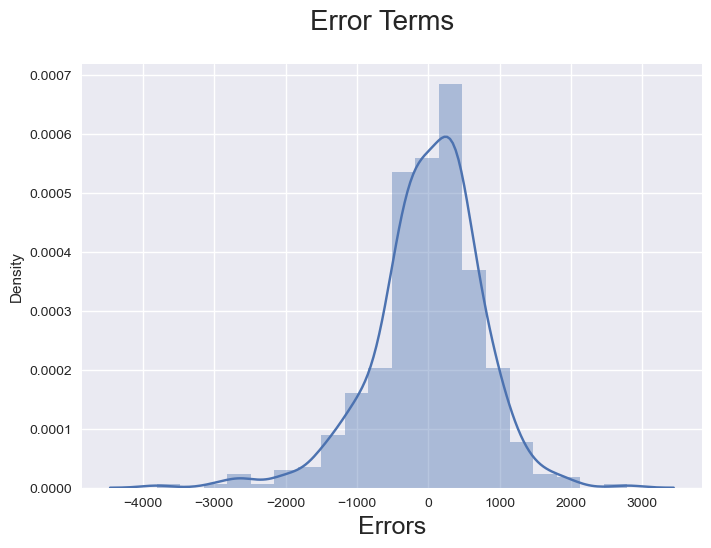

In [544]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

<h2 align="left"> <font color='brown'>Prediction</font></h2>

In [525]:
col_drop_list = ['June','Mar','Oct','atemp','Aug','Sun','Sat','Thu','Wed','May']

In [526]:
X_test_with_const = sm.add_constant(X_test)

In [527]:
X_test_revised = X_test_with_const.drop(col_drop_list,1)

In [528]:
y_test_pred = model_6.predict(X_test_revised)

<h2 align="left"> <font color='brown'>Model Evaluation</font></h2>

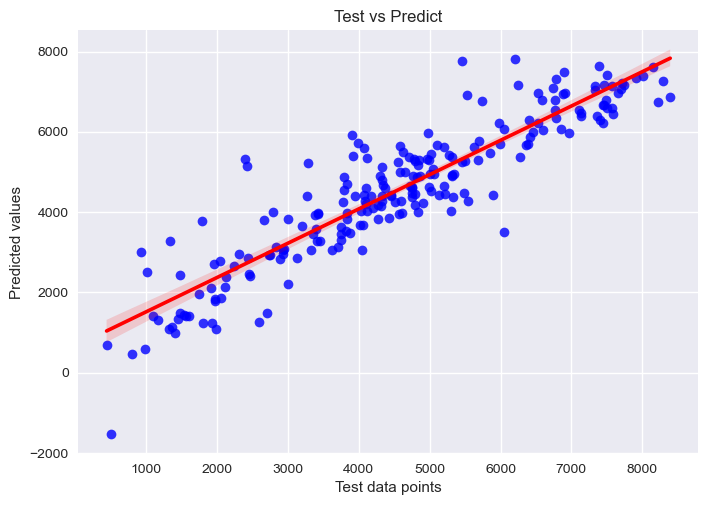

In [546]:
#Regression plot
sns.regplot(x=y_test, y=y_test_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Test vs Predict')              # Plot heading 
plt.xlabel('Test data points')                          # X-label
plt.ylabel('Predicted values')                          # Y-label
plt.show()

- **Evaluating R2 value for test data**

In [530]:
from sklearn.metrics import r2_score

In [555]:
test_re2_score = r2_score(y_test,y_test_pred)
test_re2_score*100

82.79706522058929

<div class="alert alert-block alert-info">
<b>Conclusion</b>
    <br><br>
    <li>R-square of train : 84.96 % </li>
    <li>R-square of test : 82.8 % </li>
    
<b> Hence the model is predicting good </b>
</div>

<h1 align="left"> <font color='green'>Summary</font></h1>

  - Temperature variable has a good correlation with bike demands.
  - 2019 bike demad was more, hence post covid situation has improved.
  - Summer and Winter season, September month,Weekends and Working days have good influence on bike demands.
  - Mist + cloudy and Light snow weather has negative effect on bike demands.
  - Few variables are having negative coorelation with bike demands , means bike demands are less due to season change,high wind or humidity etc.
